# Used Phones & Tablets Pricing Dataset
<center>
<img src="https://i.imgur.com/M29eSKC.gif" width="500" height="400" />
</center>

## Introduction

Used phones and tablets have become increasingly popular in both the global and Indian markets in recent years. The rise of e-commerce platforms, improved quality of refurbished devices, and the increasing affordability of technology have all contributed to this trend.

Around the world, consumers are realizing the many benefits of purchasing used devices. Not only do these devices offer a more affordable alternative to brand-new gadgets, but they also have a smaller environmental impact. Many consumers are also attracted to the idea of reducing waste by giving new life to a previously-owned device.

In addition to being more affordable, used phones and tablets in India often come with a warranty, providing peace of mind to consumers who may be worried about purchasing a previously-owned device. This, combined with the improved quality of refurbished devices, has made used phones and tablets a popular choice for many consumers in India.

In addition, companies that collect and refurbish used devices can also collect valuable data and insights about consumer behavior and preferences, which can inform their future product development and marketing efforts. Overall, the collection and reselling of used phones and tablets can be a profitable and socially responsible business model for companies.

## Problem Statement

As a data scientist working at a company specializing in the collection and resale of used phones and tablets, the goal is to build a regression model to predict the used price of these devices. This information is crucial for the company to effectively price their devices and maximize their profits.

The dataset contains information about the used phone prices and tablets, including the model, OS, battery, screen size, storage capacity, and other relevant features. The task is to perform exploratory data analysis (EDA) on the dataset to understand the underlying relationships and patterns in the data, and then build a regression model to predict the used price of the devices.

The final model should be highly accurate and able to generalize well to unseen data. This project will provide valuable insights into the used phone and tablet market and enable the company to make informed pricing decisions.

## Ways to approach

• **What is the problem you're trying to solve?** 
    The goal is to build a regression model to predict the used price of these devices.

• **What data do you have available?** Data containing the information about the used phone prices and tablets, including the model, OS, battery, screen size, storage capacity, and other relevant features.

• **What are the potential solution(s) you can implement?** Analyzing the features to find out the pattern and relationhip with the target 
variables that could help in getting better evaluation results

• **What performance metrics will you use to evaluate your solution?** Using MSE and R2 score to evaluate the regression model

• **What techniques will you use?**

        * Data processing
        * EDA
        * Feature Engineering
        * Scaling and Normalization
        * Model Selection and Evaluation
        * Test the model
        
• **How will you validate your solution?** Model which provides low MSE and high R2 score close to 1 would be validation point to select the best model



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Processing

In [ ]:
df = pd.read_csv('/kaggle/input/used-handheld-device-data/used_device_data.csv')

In [ ]:
df

### Variables
* **device_brand**: Name of manufacturing brand
* **os**: OS on which the device runs
* **screen_size**: Size of the screen in cm
* **4g**: Whether 4G is available or not
* **5g**: Whether 5G is available or not
* **front_camera_mp**: Resolution of the rear camera in megapixels
* **back_camera_mp**: Resolution of the front camera in megapixels
* **internal_memory**: Amount of internal memory (ROM) in GB
* **ram**: Amount of RAM in GB
* **battery**: Energy capacity of the device battery in mAh
* **weight**: Weight of the device in grams
* **release_year**: Year when the device model was released
* **days_used**: Number of days the used/refurbished device has been used
* **normalized_new_price**: Normalized price of a new device of the same model
* **normalized_used_price** (TARGET): Normalized price of the used/refurbished device

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
df.dtypes

In [ ]:
df.shape

In [ ]:
duplicated_rows= df[df.duplicated()]
duplicated_rows.shape

Good thing, that there is no duplicated rows.

In [ ]:
df.isnull().sum()

We could see some null values in dataset. Removing those won't be a correct option as we have less rows. We'll treat it. But first we'll check whether we have outliers in the following columns

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 

features=['rear_camera_mp','front_camera_mp','internal_memory','ram','battery','weight']

for i in features:
    sns.boxplot(df[i])
    plt.show()
    




We could see that there is outliers in the data. When we have outliers, it is good to replace the null values with median values as median values are not affected by outliers.

In [ ]:
for i in features:
    a=df[i].median()
    print(i,' median value : ', a)
    df[i]= df[i].fillna(a)

In [ ]:
df.isnull().sum()

Great! Now we have treated the null values. Now let's explore the columns

# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
num_features=[feature for feature in df.columns if df[feature].dtype != 'O']
num_features

In [ ]:
cat_features=[feature for feature in df.columns if df[feature].dtype == 'O']
cat_features

First lets see the distribution of features using histogram

In [ ]:
fig,axs= plt.subplots(5,3,figsize=(15, 15))
# Flatten the 2D array of subplots to make them easier to access
axs = axs.ravel()
for i, feature in enumerate(df.columns):
    # Plot a histogram of the feature in the current subplot
    axs[i].hist(df[feature])
    axs[i].set_title(feature)


# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()






In [ ]:
fig= plt.figure(figsize=(15,10))
sns.countplot(x=df.device_brand,order=df["device_brand"].value_counts().index)
plt.xticks(rotation=90)

* **Samsung** was the most reused phone next to phone brands which are categorized as **Others**. 
* There are more people using **Android** OS
* Screen size is mostly between **10-15**
* **4g and 5g** users are more
* Rear camera mp range is mostly between **5-15** mega pixels
* Front camera mp range is mostly between **0-10** mega pixels
* Internal memory is mostly between **0-100**
* Phones ram storage is mostly between **3-5** GB
* Battery life is mostly around **3000** mah
* Weight is around **150-210**
* Most of the phones were released between **2013-2015**
* People have used the phones on an average between **600-800** days which is approximately 2-2.5 years
* Average normalized used price was between **4.2-5** k
* Average normalized new price was between **5-6** k

### Numerical features

In [ ]:
fig,axs= plt.subplots(4,3,figsize=(15, 15))
# Flatten the 2D array of subplots to make them easier to access
axs = axs.ravel()
for i, feature in enumerate(num_features):
    
    axs[i].boxplot(df[feature])
    axs[i].set_title(feature)

# method used to remove an axis from a figure; here removing last grid--> 12th grid since we only have 11 numerical features
fig.delaxes(axs[-1])
# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

We could see the outliers in the above features. We'll correct it in the upcoming sections

### Categorical features

We have seen the univariate analysis of categorical variables in the histplot already.

## Detecting and treating outliers

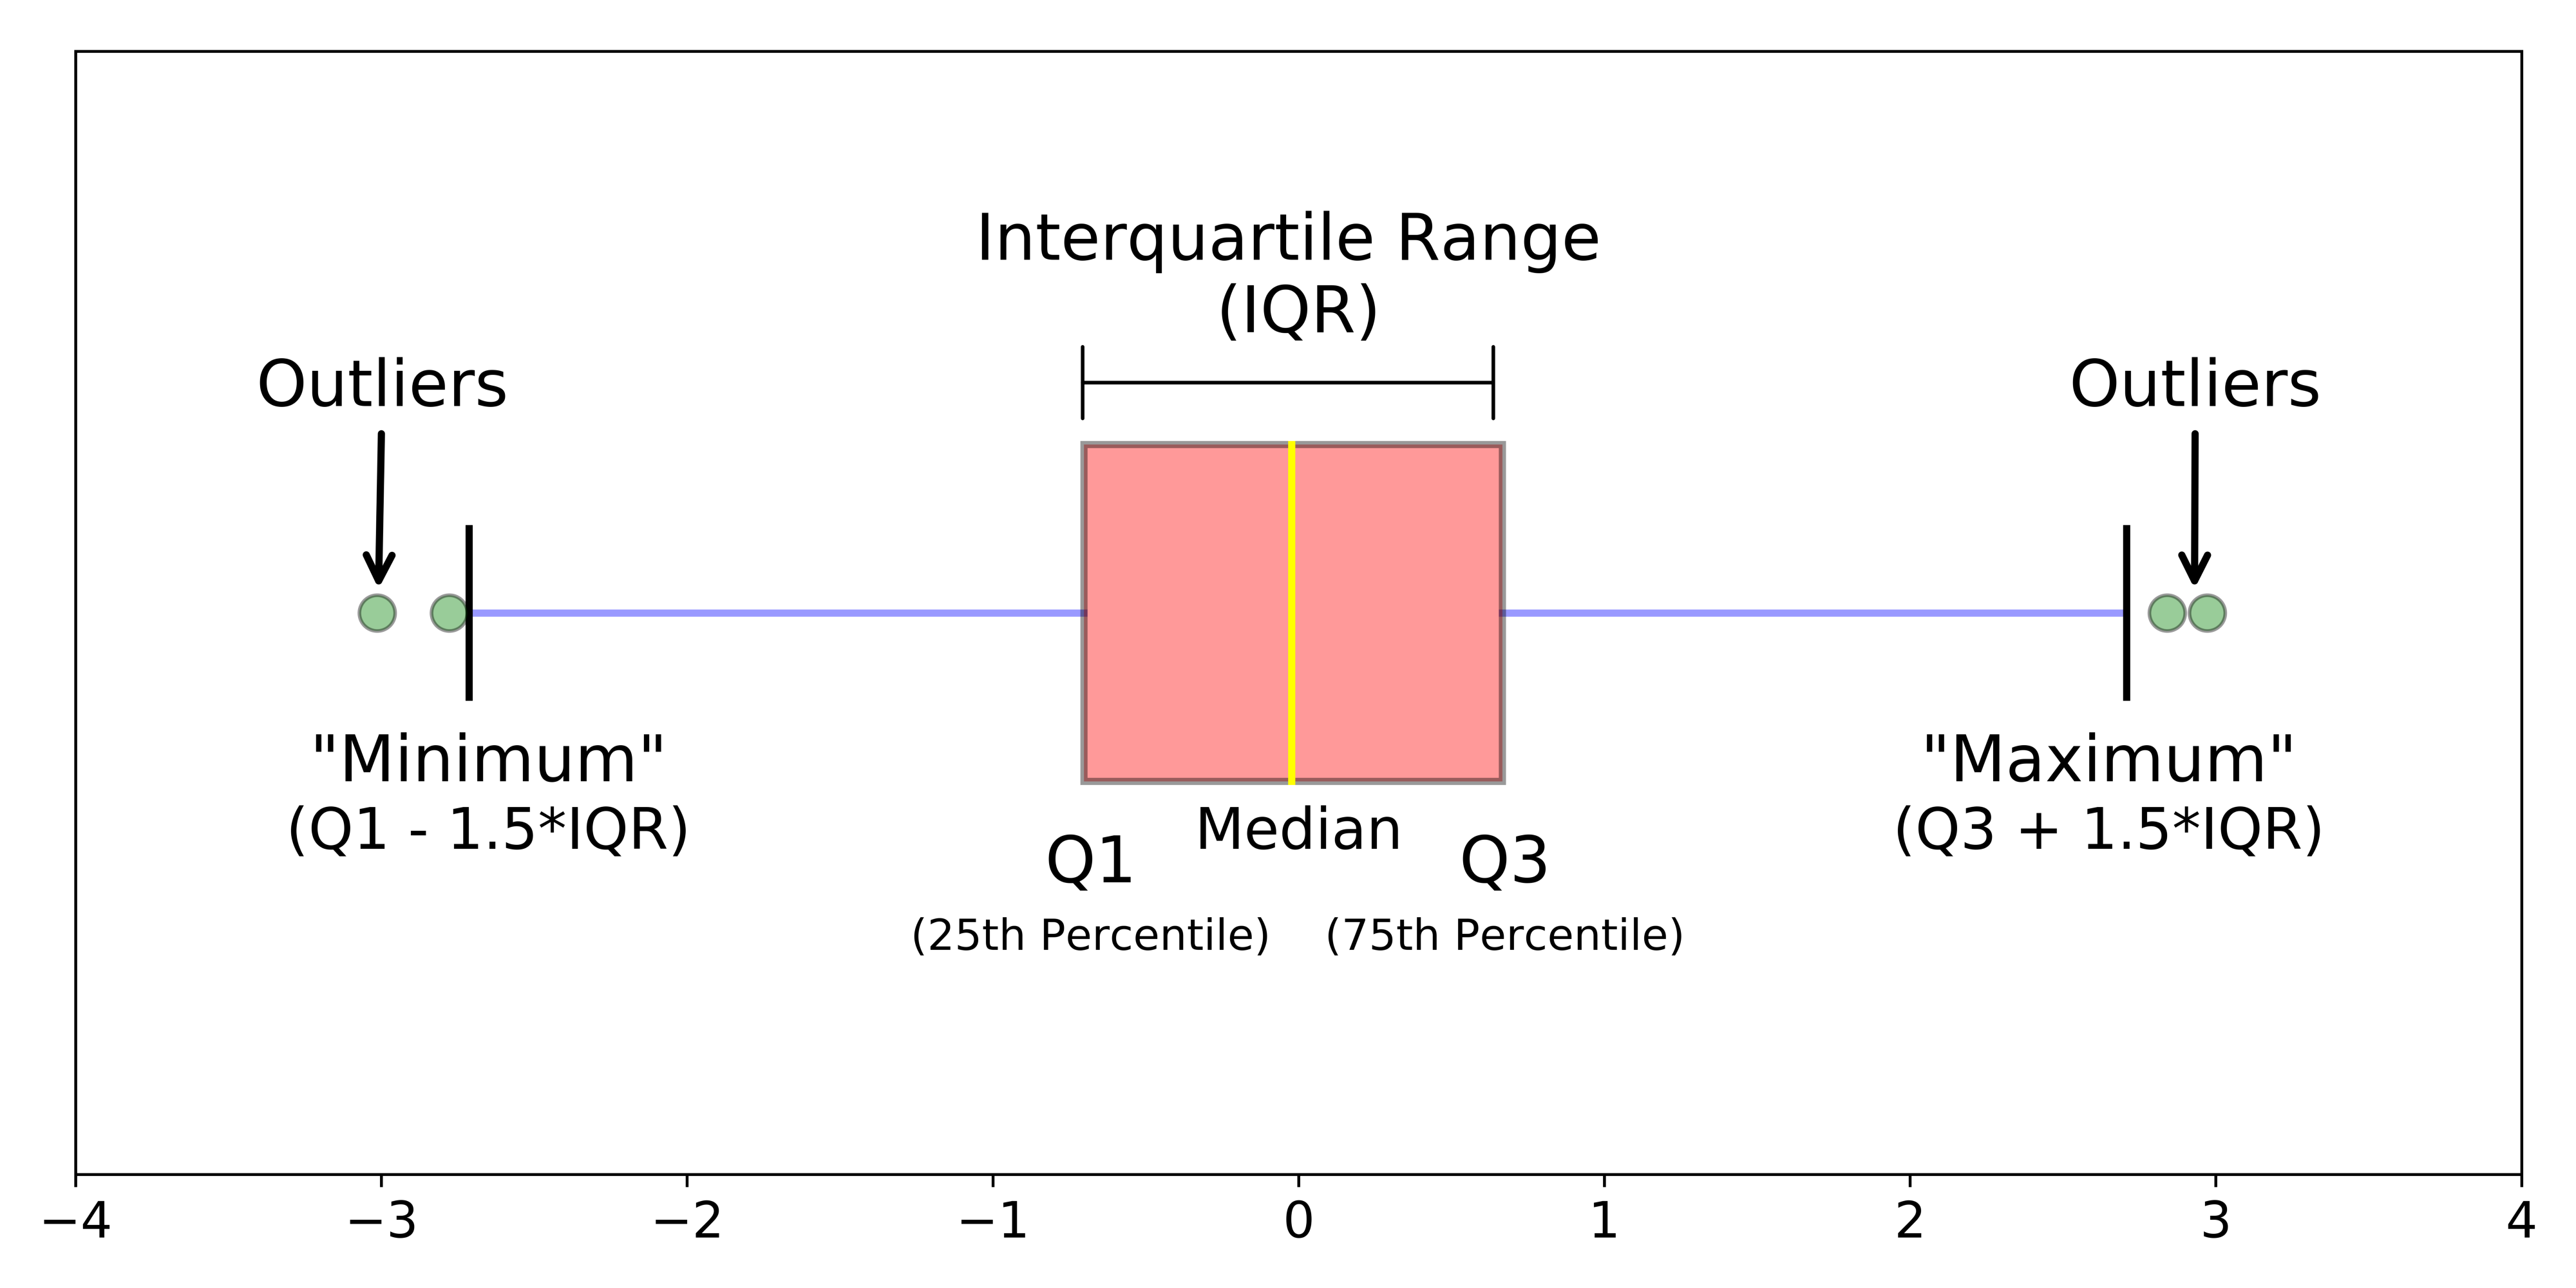

In [ ]:
features=['screen_size',
 'front_camera_mp',
 'ram',
 'battery',
 'weight',
 'normalized_used_price',
 'normalized_new_price']
for i in features:
    lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    df[i] = np.where(df[i] <lower, lower,df[i])
    df[i] = np.where(df[i] >upper, upper,df[i])
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')
    

In [ ]:
fig,axs= plt.subplots(4,3,figsize=(15, 15))
# Flatten the 2D array of subplots to make them easier to access
axs = axs.ravel()
for i, feature in enumerate(num_features):
    
    axs[i].boxplot(df[feature])
    axs[i].set_title(feature)

# method used to remove an axis from a figure; here removing last grid--> 12th grid since we only have 11 numerical features
fig.delaxes(axs[-1])
# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

Treating rear_camera_mp, internal_memory and battery separately

In [ ]:
upper= df.rear_camera_mp.quantile(0.95)
df.rear_camera_mp= np.where(df.rear_camera_mp>upper,upper,df.rear_camera_mp)

upper= df.internal_memory.quantile(0.9)
df.internal_memory= np.where(df.internal_memory>upper,upper,df.internal_memory)

upper= df.weight.quantile(0.8)
df.weight= np.where(df.weight>upper,upper,df.weight)

In [ ]:
fig,axs= plt.subplots(4,3,figsize=(15, 15))
# Flatten the 2D array of subplots to make them easier to access
axs = axs.ravel()
for i, feature in enumerate(num_features):
    
    axs[i].boxplot(df[feature])
    axs[i].set_title(feature)

# method used to remove an axis from a figure; here removing last grid--> 12th grid since we only have 11 numerical features
fig.delaxes(axs[-1])
# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

## Bivariate Analysis

Let us check out the relationship between numerical features with target feature --> normalized used price

In [ ]:
bi_num=['screen_size',
 'rear_camera_mp',
 'front_camera_mp',
 'internal_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_new_price']


In [ ]:
fig,axs= plt.subplots(5,2,figsize=(12,12))
axs=axs.ravel()
for i,ax in enumerate(axs):

    sns.regplot(x=bi_num[i],y='normalized_used_price',data=df,ax=ax,color='black',scatter_kws={"color":"blue"})

plt.tight_layout()
plt.show()


* Days used has **negative**/falling regression line 
* Ram has no line as it has most values on 4
* All other numerical features has rising/**positive** regression line

In [ ]:
fig,axs= plt.subplots(2,2,figsize=(15,15))
axs=axs.ravel()
for i,ax in enumerate(axs):
    sns.boxplot(x=cat_features[i],y='normalized_used_price',data=df,ax=ax)

plt.tight_layout()
plt.show()

# Feature Engineering

We'll be using **Mutual Information** inorder to find the mutual dependance between the features with target variable. t can be used to quantify the relationship between two variables and to determine whether they are dependent or independent of each other.

In [ ]:
X= df.drop('normalized_used_price',axis=1)
y= df.normalized_used_price

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer/float dtypes (double-check this before using MI!)
X.dtypes == object

In [ ]:
from sklearn.feature_selection import mutual_info_regression


mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores  # show a few features with their MI scores

Top 5 features which has more dependence are **normalized_new_price, screen_size, front_camera_mp, battery, internal_memory**

We'll do dimesionality reduction using **Principal Compound Analysis**

The idea is to project original data onto a lower-dimensional space while retaining as much of the variation in the data as possible. This can help to reduce noise and improve the accuracy and interpretability of regression models. 

In [ ]:
from sklearn.decomposition import PCA


def PCAx(X):

    # Create a PCA model with the desired number of components
    pca = PCA()

    # Fit the PCA model to the data
    pca.fit(X)

    # Transform the data into the new feature space
    X_pca = pca.transform(X)
    return X_pca

The output of PCA (Principal Component Analysis) is a transformed set of features (Principal Components) that captures the most important information in the original set of features. 

When we don't specify n_components, the PCA algorithm will calculate the number of components that can retain a certain proportion of the total variance in the dataset. This proportion is usually set to 0.95, meaning that 95% of the variance will be retained.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

# dataset split
# creating a function for dataset split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)

# Scaling and Normalization

It is generally recommended to scale and normalize data before modeling in order to ensure that all features have equal weightage and similar distributions. This can prevent certain features from dominating the model, which can lead to overfitting or incorrect results.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    return X

# Model Selection and Evaluation

### Approach to train and validate model

1. Use top 5 features and perform Decision Tree Regression
2. Use all features and perform Decision Tree Regression
3. Use top 5 features and perform Random Forest Regression
4. Use all features and perform Random Forest Regression
5. Use top 5 features and perform Linear Regression
6. Use all features and perform Linear Regression
7. Use top 5 features and perform Ridge Regression
8. Use all features and perform Ridge Regression
9. Use top 5 features and perform Lasso Regression
10. Use all features and perform Lasso Regression
11. Use top 5 features and perform Support Vector Regression
12. Use all features and perform Support Vector Regression
13. Use top 5 features and perform XGB Regression
14. Use all features and perform XGB Regression

To get top 5 features, we'll use **SelectKBest** 

For evaluation we'll use **R2** and **MSE**

The main difference between R2 and MSE is that R2 is a relative measure, while MSE is an absolute measure. R2 indicates how well the model fits the data compared to a baseline model, while MSE gives the actual magnitude of the error in the model's predictions.

## 1. Use top 5 features and perform Decision Tree Regression


In [ ]:
scores=[]

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X= df.drop('normalized_used_price',axis=1)
y= df.normalized_used_price

X=pd.get_dummies(X)

k = 5 # number of top features to select
top_k_features = SelectKBest(score_func=mutual_info_regression, k=k).fit(X, y)
X_new = top_k_features.transform(X)

X_new= scale(X_new)
X= PCAx(X_new)
X_train,X_val,y_train,y_val= dataset(X,y)

decision_model= DecisionTreeRegressor(random_state=1)
decision_model.fit(X_train, y_train)
preds= decision_model.predict(X_val)

r2= r2_score(y_val,preds)
MSE= mean_squared_error(y_val,preds)


a= "Decision Tree Regression with top 5 features"
print(a)
print("R2: ",round(r2,4))
print("MSE: ",round(MSE,4))

scores.append((a,round(r2,4),round(MSE,4)))


## 2. Use all features and perform Decision Tree Regression


In [ ]:
X= df.drop('normalized_used_price',axis=1)
y= df.normalized_used_price

X=pd.get_dummies(X)


X= scale(X)
X= PCAx(X)

X_train,X_val,y_train,y_val= dataset(X,y)

decision_model1= DecisionTreeRegressor(random_state=1)
decision_model1.fit(X_train, y_train)
preds= decision_model1.predict(X_val)

r2= r2_score(y_val,preds)
MSE= mean_squared_error(y_val,preds)


a= "Decision Tree Regreesion with all features"
print(a)
print("R2: ",round(r2,4))
print("MSE: ",round(MSE,4))

scores.append((a,round(r2,4),round(MSE,4)))


## 3. Use top 5 features and perform Random Forest Regression


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X= df.drop('normalized_used_price',axis=1)
y= df.normalized_used_price

X=pd.get_dummies(X)

k = 5 # number of top features to select
top_k_features = SelectKBest(score_func=mutual_info_regression, k=k).fit(X, y)
X_new = top_k_features.transform(X)

X_new= scale(X_new)
X= PCAx(X_new)
X_train,X_val,y_train,y_val= dataset(X,y)

random_model= RandomForestRegressor(random_state=1)
random_model.fit(X_train, y_train)
preds= random_model.predict(X_val)

r2= r2_score(y_val,preds)
MSE= mean_squared_error(y_val,preds)


a= "Random Forest Regression with top 5 features"
print(a)
print("R2: ",round(r2,4))
print("MSE: ",round(MSE,4))

scores.append((a,round(r2,4),round(MSE,4)))


## 4. Use all features and perform Random Forest Regression


In [ ]:

X= df.drop('normalized_used_price',axis=1)
y= df.normalized_used_price

X=pd.get_dummies(X)


X= scale(X)
X= PCAx(X)
X_train,X_val,y_train,y_val= dataset(X,y)

random_model1= RandomForestRegressor(random_state=1)
random_model1.fit(X_train, y_train)
preds= random_model1.predict(X_val)

r2= r2_score(y_val,preds)
MSE= mean_squared_error(y_val,preds)


a= "Random Forest Regression with all features"
print(a)
print("R2: ",round(r2,4))
print("MSE: ",round(MSE,4))

scores.append((a,round(r2,4),round(MSE,4)))


## 5. Use top 5 features and perform Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X= df.drop('normalized_used_price',axis=1)
y= df.normalized_used_price

X=pd.get_dummies(X)

k = 5 # number of top features to select
top_k_features = SelectKBest(score_func=mutual_info_regression, k=k).fit(X, y)
X_new = top_k_features.transform(X)

X_new= scale(X_new)
X= PCAx(X_new)
X_train,X_val,y_train,y_val= dataset(X,y)

linear_model= LinearRegression()
linear_model.fit(X_train, y_train)
preds= linear_model.predict(X_val)

r2= r2_score(y_val,preds)
MSE= mean_squared_error(y_val,preds)


a= "Linear Regression with top 5 features"
print(a)
print("R2: ",round(r2,4))
print("MSE: ",round(MSE,4))

scores.append((a,round(r2,4),round(MSE,4)))


## 6. Use all features and perform Linear Regression


In [ ]:

X= df.drop('normalized_used_price',axis=1)
y= df.normalized_used_price

X=pd.get_dummies(X)

X= scale(X)
X= PCAx(X)
X_train,X_val,y_train,y_val= dataset(X,y)

linear_model1= LinearRegression()
linear_model1.fit(X_train, y_train)
preds= linear_model1.predict(X_val)

r2= r2_score(y_val,preds)
MSE= mean_squared_error(y_val,preds)


a= "Linear Regression with all features"
print(a)
print("R2: ",round(r2,4))
print("MSE: ",round(MSE,4))

scores.append((a,round(r2,4),round(MSE,4)))


## 7. Use top 5 features and perform Ridge Regression


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X= df.drop('normalized_used_price',axis=1)
y= df.normalized_used_price

X=pd.get_dummies(X)

k = 5 # number of top features to select
top_k_features = SelectKBest(score_func=mutual_info_regression, k=k).fit(X, y)
X_new = top_k_features.transform(X)

X_new= scale(X_new)
X= PCAx(X_new)
X_train,X_val,y_train,y_val= dataset(X,y)

ridge_model= Ridge(random_state=1)
ridge_model.fit(X_train, y_train)
preds= ridge_model.predict(X_val)

r2= r2_score(y_val,preds)
MSE= mean_squared_error(y_val,preds)


a= "Ridge Regression with top 5 features"
print(a)
print("R2: ",round(r2,4))
print("MSE: ",round(MSE,4))

scores.append((a,round(r2,4),round(MSE,4)))


## 8. Use all features and perform Ridge Regression


In [ ]:

X= df.drop('normalized_used_price',axis=1)
y= df.normalized_used_price

X=pd.get_dummies(X)


X= scale(X)
X= PCAx(X)
X_train,X_val,y_train,y_val= dataset(X,y)

ridge_model1= Ridge(random_state=1)
ridge_model1.fit(X_train, y_train)
preds= ridge_model1.predict(X_val)

r2= r2_score(y_val,preds)
MSE= mean_squared_error(y_val,preds)


a= "Ridge Regression with all features"
print(a)
print("R2: ",round(r2,4))
print("MSE: ",round(MSE,4))

scores.append((a,round(r2,4),round(MSE,4)))


## 9. Use top 5 features and perform Lasso Regression


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X= df.drop('normalized_used_price',axis=1)
y= df.normalized_used_price

X=pd.get_dummies(X)

k = 5 # number of top features to select
top_k_features = SelectKBest(score_func=mutual_info_regression, k=k).fit(X, y)
X_new = top_k_features.transform(X)

X_new= scale(X_new)
X= PCAx(X_new)
X_train,X_val,y_train,y_val= dataset(X,y)

lasso_model= Lasso(random_state=1)
lasso_model.fit(X_train, y_train)
preds= lasso_model.predict(X_val)

r2= r2_score(y_val,preds)
MSE= mean_squared_error(y_val,preds)


a= "Lasso Regression with top 5 features"
print(a)
print("R2: ",round(r2,4))
print("MSE: ",round(MSE,4))

scores.append((a,round(r2,4),round(MSE,4)))


## 10. Use all features and perform Lasso Regression


In [ ]:

X= df.drop('normalized_used_price',axis=1)
y= df.normalized_used_price

X=pd.get_dummies(X)

X= scale(X)
X= PCAx(X)
X_train,X_val,y_train,y_val= dataset(X,y)

lasso_model1= Lasso(random_state=1)
lasso_model1.fit(X_train, y_train)
preds= lasso_model1.predict(X_val)

r2= r2_score(y_val,preds)
MSE= mean_squared_error(y_val,preds)


a= "Lasso Regression with all features"
print(a)
print("R2: ",round(r2,4))
print("MSE: ",round(MSE,4))

scores.append((a,round(r2,4),round(MSE,4)))


## 11. Use top 5 features and perform Support Vector Regression


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X= df.drop('normalized_used_price',axis=1)
y= df.normalized_used_price

X=pd.get_dummies(X)

k = 5 # number of top features to select
top_k_features = SelectKBest(score_func=mutual_info_regression, k=k).fit(X, y)
X_new = top_k_features.transform(X)

X_new= scale(X_new)
X= PCAx(X_new)
X_train,X_val,y_train,y_val= dataset(X,y)

svm_model= SVR(kernel='linear')
svm_model.fit(X_train, y_train)
preds= svm_model.predict(X_val)

r2= r2_score(y_val,preds)
MSE= mean_squared_error(y_val,preds)


a= "SVM Regression with top 5 features"
print(a)
print("R2: ",round(r2,4))
print("MSE: ",round(MSE,4))

scores.append((a,round(r2,4),round(MSE,4)))


## 12. Use all features and perform Support Vector Regression


In [ ]:

X= df.drop('normalized_used_price',axis=1)
y= df.normalized_used_price

X=pd.get_dummies(X)


X= scale(X)
X= PCAx(X)
X_train,X_val,y_train,y_val= dataset(X,y)

svm_model1= SVR(kernel='linear')
svm_model1.fit(X_train, y_train)
preds= svm_model1.predict(X_val)

r2= r2_score(y_val,preds)
MSE= mean_squared_error(y_val,preds)


a= "SVM Regression with all features"
print(a)
print("R2: ",round(r2,4))
print("MSE: ",round(MSE,4))

scores.append((a,round(r2,4),round(MSE,4)))


## 13. Use top 5 features and perform XGB Regression


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X= df.drop('normalized_used_price',axis=1)
y= df.normalized_used_price

X=pd.get_dummies(X)

k = 5 # number of top features to select
top_k_features = SelectKBest(score_func=mutual_info_regression, k=k).fit(X, y)
X_new = top_k_features.transform(X)

X_new= scale(X_new)
X= PCAx(X_new)
X_train,X_val,y_train,y_val= dataset(X,y)

xgb_model= XGBRegressor()
xgb_model.fit(X_train, y_train)
preds= xgb_model.predict(X_val)

r2= r2_score(y_val,preds)
MSE= mean_squared_error(y_val,preds)


a= "XGB Regression with top 5 features"
print(a)
print("R2: ",round(r2,4))
print("MSE: ",round(MSE,4))

scores.append((a,round(r2,4),round(MSE,4)))


## 14. Use all features and perform XGB Regression

In [ ]:

X= df.drop('normalized_used_price',axis=1)
y= df.normalized_used_price

X=pd.get_dummies(X)

X= scale(X)
X= PCAx(X)
X_train,X_val,y_train,y_val= dataset(X,y)

xgb_model1= XGBRegressor()
xgb_model1.fit(X_train, y_train)
preds= xgb_model1.predict(X_val)

r2= r2_score(y_val,preds)
MSE= mean_squared_error(y_val,preds)


a= "XGB Regression with all features"
print(a)
print("R2: ",round(r2,4))
print("MSE: ",round(MSE,4))

scores.append((a,round(r2,4),round(MSE,4)))


In [ ]:
scores

In [ ]:
columns=['models','R2','MSE']
score= pd.DataFrame(scores, columns=columns)
score.head(14)

The best model would be the one that gives the highest R2 score and lowest MSE.

Here we could see,

* Linear Regression with top 5 features
* Linear Regression with all features
* Ridge Regression with top 5 features
* Ridge Regression with all features
* SVM Regression with top 5 features
* SVM Regression with all features

gives us better performance

Let us test these models with test data and select the best model


In [ ]:
best_model=[]

### Linear Regression with top 5 features 

In [ ]:

X= df.drop('normalized_used_price',axis=1)
y= df.normalized_used_price

X=pd.get_dummies(X)

k = 5 # number of top features to select
top_k_features = SelectKBest(score_func=mutual_info_regression, k=k).fit(X, y)
X_new = top_k_features.transform(X)

X_new= scale(X_new)
X= PCAx(X_new)
train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)

preds= linear_model.predict(test_X)

r2= r2_score(test_y,preds)
MSE= mean_squared_error(test_y,preds)


a= "Linear Regression with top 5 features"
print(a)
print("R2: ",round(r2,4))
print("MSE: ",round(MSE,4))

best_model.append((a,r2,MSE))


### Ridge Regression with top 5 features

In [ ]:

X= df.drop('normalized_used_price',axis=1)
y= df.normalized_used_price

X=pd.get_dummies(X)

k = 5 # number of top features to select
top_k_features = SelectKBest(score_func=mutual_info_regression, k=k).fit(X, y)
X_new = top_k_features.transform(X)

X_new= scale(X_new)
X= PCAx(X_new)
train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)

preds= ridge_model.predict(test_X)

r2= r2_score(test_y,preds)
MSE= mean_squared_error(test_y,preds)


a= "Ridge Regression with top 5 features"
print(a)
print("R2: ",round(r2,4))
print("MSE: ",round(MSE,4))

best_model.append((a,r2,MSE))


### SVM Regression with top 5 features

In [ ]:

X= df.drop('normalized_used_price',axis=1)
y= df.normalized_used_price

X=pd.get_dummies(X)

k = 5 # number of top features to select
top_k_features = SelectKBest(score_func=mutual_info_regression, k=k).fit(X, y)
X_new = top_k_features.transform(X)

X_new= scale(X_new)
X= PCAx(X_new)
train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)

preds= svm_model.predict(test_X)

r2= r2_score(test_y,preds)
MSE= mean_squared_error(test_y,preds)


a= "SVM Regression with top 5 features"
print(a)
print("R2: ",round(r2,4))
print("MSE: ",round(MSE,4))

best_model.append((a,r2,MSE))


### Linear Regression with all features

In [ ]:

X= df.drop('normalized_used_price',axis=1)
y= df.normalized_used_price

X=pd.get_dummies(X)

X_new=X.copy()

X_new= scale(X_new)
X= PCAx(X_new)
train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)

preds= linear_model1.predict(test_X)

r2= r2_score(test_y,preds)
MSE= mean_squared_error(test_y,preds)


a= "Linear Regression with all features"
print(a)
print("R2: ",round(r2,4))
print("MSE: ",round(MSE,4))

best_model.append((a,r2,MSE))


### Ridge Regression with all features

In [ ]:

X= df.drop('normalized_used_price',axis=1)
y= df.normalized_used_price

X=pd.get_dummies(X)

X_new=X.copy()

X_new= scale(X_new)
X= PCAx(X_new)
train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)

preds= ridge_model1.predict(test_X)

r2= r2_score(test_y,preds)
MSE= mean_squared_error(test_y,preds)


a= "Ridge Regression with all features"
print(a)
print("R2: ",round(r2,4))
print("MSE: ",round(MSE,4))

best_model.append((a,r2,MSE))


### SVM Regression with all features

In [ ]:

X= df.drop('normalized_used_price',axis=1)
y= df.normalized_used_price

X=pd.get_dummies(X)

X_new=X.copy()

X_new= scale(X_new)
X= PCAx(X_new)
train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)

preds= svm_model1.predict(test_X)

r2= r2_score(test_y,preds)
MSE= mean_squared_error(test_y,preds)


a= "SVM Regression with all features"
print(a)
print("R2: ",round(r2,4))
print("MSE: ",round(MSE,4))

best_model.append((a,r2,MSE))


In [ ]:
columns=['models','R2','MSE']
best_model= pd.DataFrame(best_model, columns=columns)
best_model.head(6)


The **best model** would be **Linear Regression with top 5 features**

R2 score : 0.808201	
MSE : 0.037493

in test dataset

# Insights

* **Samsung** was the most reused phone next to phone brands which are categorized as **Others**. 
* There are more people using **Android** OS
* Screen size is mostly between **10-15**
* **4g and 5g** users are more
* Rear camera mp range is mostly between **5-15** mega pixels
* Front camera mp range is mostly between **0-10** mega pixels
* Internal memory is mostly between **0-100**
* Phones ram storage is mostly between **3-5** GB
* Battery life is mostly around **3000** mah
* Weight is around **150-210**
* Most of the phones were released between **2013-2015**
* People have used the phones on an average between **600-800** days which is approximately 2-2.5 years
* Average normalized used price was between **4.2-5** k
* Average normalized new price was between **5-6** k
* Most of the features has rising relationship with the target variable --> normalized used price
* **Linear Regression** with top 5 features was considered to be the best model for this problem.


# What I've learnt!

* Plotting histogram using subplots makes visualization easier
* If we need to remove the last plot in a subplot for the visualizations which has odd number(eg: 11 plots but subplots shows 12), we can remove last one using **delaxes**
* Using **regplot** on bivariate analysis helps us to identify the rising/falling relationship with target variables
* **SelectKBest** in feature selection can be used to pick up top K number of features which can used in model training
* PCA can be used for dimensionality reduction

# Things to try it out next!
* Applying crossvalidation concepts in model training
* Applying Pipeline conecpts in model training
* Using Q-plots to visualize the distribution of a dataset and to compare it to a theoretical distribution
* Trying out other Feature selection methods
* Using Z scores to treat outliers
* Deploying the model

# References

* https://www.kaggle.com/code/sasakitetsuya/used-mobile-phone-price-prediction-by-6-models#Machine--Learning-Models
* https://www.kaggle.com/code/jayantverma9380/used-phone-price-prediction-project/notebook#Linear-Regression-Model
* ChatGPT - https://chat.openai.com/